In [7]:
import tensorflow as tf

In [2]:
import numpy as np

In [3]:
rng = np.random

In [4]:
# parameters
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [5]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])

In [8]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [9]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [10]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.163721, W: 0.291450, b: 0.516531
step: 100, loss: 0.161593, W: 0.286894, b: 0.548833
step: 150, loss: 0.159924, W: 0.282859, b: 0.577438
step: 200, loss: 0.158615, W: 0.279286, b: 0.602770
step: 250, loss: 0.157588, W: 0.276121, b: 0.625203
step: 300, loss: 0.156783, W: 0.273319, b: 0.645069
step: 350, loss: 0.156152, W: 0.270838, b: 0.662661
step: 400, loss: 0.155657, W: 0.268640, b: 0.678241
step: 450, loss: 0.155269, W: 0.266694, b: 0.692037
step: 500, loss: 0.154964, W: 0.264971, b: 0.704255
step: 550, loss: 0.154726, W: 0.263445, b: 0.715074
step: 600, loss: 0.154538, W: 0.262093, b: 0.724655
step: 650, loss: 0.154391, W: 0.260897, b: 0.733140
step: 700, loss: 0.154276, W: 0.259837, b: 0.740654
step: 750, loss: 0.154186, W: 0.258898, b: 0.747308
step: 800, loss: 0.154115, W: 0.258067, b: 0.753201
step: 850, loss: 0.154060, W: 0.257331, b: 0.758419
step: 900, loss: 0.154016, W: 0.256679, b: 0.763041
step: 950, loss: 0.153982, W: 0.256102, b: 0.767133
step: 1000, l

In [11]:
import matplotlib.pyplot as plt

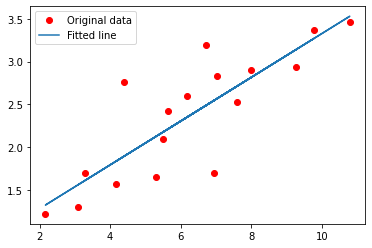

In [12]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()